### Loading The Dataset

In [2]:
import pandas as pd

path = r"C:\Users\lilkl\OneDrive\Plocha\Data Scientist\Projects for GitHub\Car insurance data\Car_Insurance_Claim.csv"
data = pd.read_csv(path)
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


### Data Wrangling

In [5]:
missing_values = data.isnull().sum()

duplicated_values = data.duplicated().sum()

print(missing_values, '\n')
print(duplicated_values)

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64 

0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['CREDIT_SCORE'] = imputer.fit_transform(data[['CREDIT_SCORE']])
data['ANNUAL_MILEAGE'] = imputer.fit_transform(data[['ANNUAL_MILEAGE']])

missing_values_after_imputation = data.isnull().sum()

categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

print(missing_values_after_imputation) 

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


In [13]:
data_encoded.head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,569520,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,...,False,False,False,False,True,False,True,False,True,False
1,750365,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,...,True,False,False,True,False,False,False,True,True,False
2,199901,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,...,False,False,False,False,False,True,False,True,True,False
3,478866,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,...,False,True,False,False,False,True,False,True,True,False
4,731664,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,...,True,False,False,False,False,True,False,True,True,False


In [14]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10000 non-null  int64  
 1   CREDIT_SCORE               10000 non-null  float64
 2   VEHICLE_OWNERSHIP          10000 non-null  float64
 3   MARRIED                    10000 non-null  float64
 4   CHILDREN                   10000 non-null  float64
 5   POSTAL_CODE                10000 non-null  int64  
 6   ANNUAL_MILEAGE             10000 non-null  float64
 7   SPEEDING_VIOLATIONS        10000 non-null  int64  
 8   DUIS                       10000 non-null  int64  
 9   PAST_ACCIDENTS             10000 non-null  int64  
 10  OUTCOME                    10000 non-null  float64
 11  AGE_16-25                  10000 non-null  bool   
 12  AGE_26-39                  10000 non-null  bool   
 13  AGE_40-64                  10000 non-null  bool

### Exploratory Data Analysis (EDA)

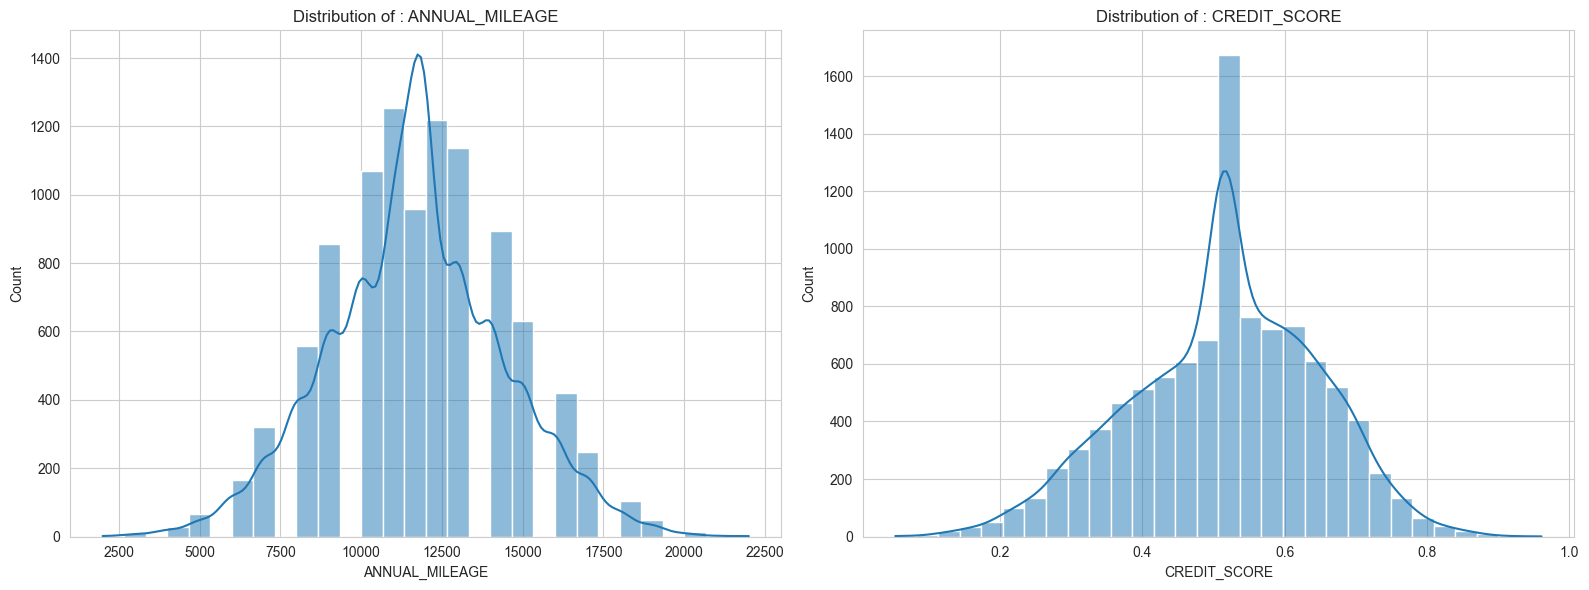

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

eda_features = ['ANNUAL_MILEAGE', 'CREDIT_SCORE']

plt.figure(figsize=(16,6))

for i, col in enumerate(eda_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(data_encoded[col], kde=True, bins=30)
    plt.title(f"Distribution of : {col}")

plt.tight_layout()
plt.show()

In [29]:
correlation_matrix = data_encoded.corr()
correlation_stacked = correlation_matrix.stack()
correlation_df = pd.DataFrame(correlation_stacked, columns=['Correlation'])
correlation_df.reset_index(inplace=True)
correlation_df.columns = ['First Column', 'Second Column', 'Correlation']
correlation_df = correlation_df[correlation_df['First Column'] != correlation_df['Second Column']]
correlation_df.sort_values(by='Correlation', ascending=False, inplace=True)
correlation_df.head(30)

,First Column,Second Column,Correlation
498,AGE_65+,DRIVING_EXPERIENCE_30y+,0.687915
762,DRIVING_EXPERIENCE_30y+,AGE_65+,0.687915
393,AGE_16-25,DRIVING_EXPERIENCE_0-9y,0.680299
657,DRIVING_EXPERIENCE_0-9y,AGE_16-25,0.680299
727,DRIVING_EXPERIENCE_20-29y,AGE_40-64,0.639698
463,AGE_40-64,DRIVING_EXPERIENCE_20-29y,0.639698
428,AGE_26-39,DRIVING_EXPERIENCE_10-19y,0.631898
692,DRIVING_EXPERIENCE_10-19y,AGE_26-39,0.631898
62,CREDIT_SCORE,INCOME_upper class,0.595553
953,INCOME_upper class,CREDIT_SCORE,0.595553


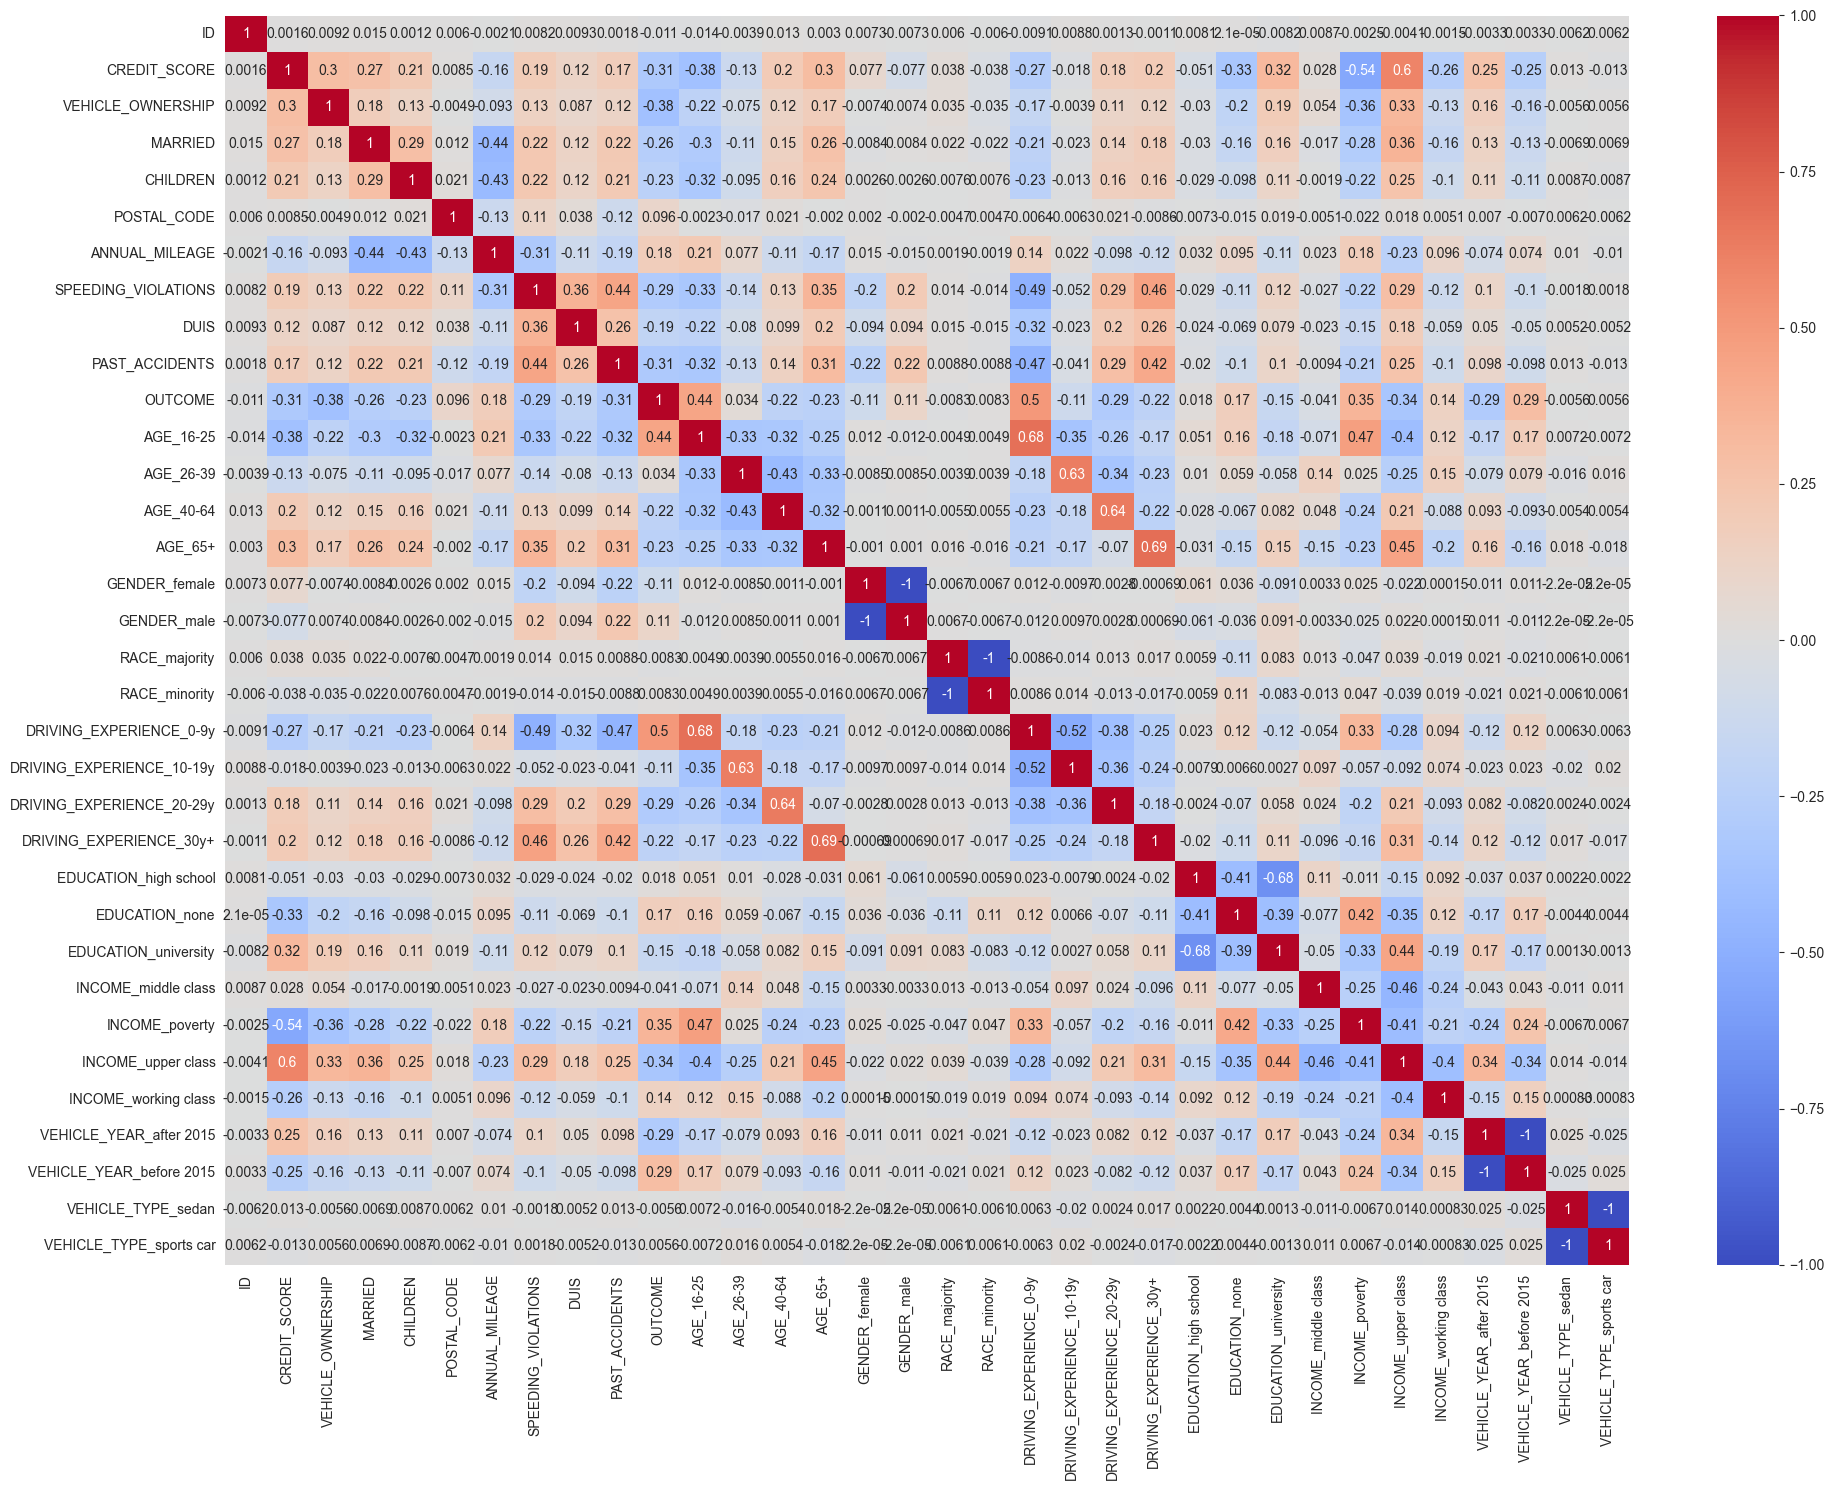

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

### Models Development

In [37]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(['ID', 'OUTCOME'], axis=1)  
y = data_encoded['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 32), (2000, 32), (8000,), (2000,))

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      1367
         1.0       0.78      0.68      0.73       633

    accuracy                           0.84      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.84      0.84      0.84      2000



c:\Users\lilkl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

class_report_knn = classification_report(y_test, y_pred_knn)

print(class_report_knn)

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85      1367
         1.0       0.69      0.64      0.67       633

    accuracy                           0.80      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.79      0.80      0.79      2000



In [49]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

class_report_dtc = classification_report(y_test, y_pred_dtc)

print(class_report_dtc)

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1367
         1.0       0.68      0.65      0.66       633

    accuracy                           0.79      2000
   macro avg       0.76      0.75      0.76      2000
weighted avg       0.79      0.79      0.79      2000



#### In conclusion, from three chosen models, Logistic Regression showed best performance and is a good candidate for further tuning and possible deployment